In [1]:
import pyteomics
import altair as alt
import pandas as pd
from pyteomics import mzml, auxiliary
import matplotlib.pyplot as plt
import spectrum_utils.plot as sup
import spectrum_utils.spectrum as sus
import XIC_functions as XIC

# XIC Tutorial
This notebook will help you to draw XICs of an ion. 

## Read in your data

In this example we will read in a psm file. This will allow us to look at our scans and pick which ones we want to draw XICs for. You do not have to upload an psm file, it is done here simply for convience and example.

Below you will be asked to put the mzml file path and the psm file path.

In [2]:
# MZML file path 
mzml_path = 'Ex_Auto_W17_30umTB_2ngQC_60m_1.mzML'

#mbr file path
psm_path = 'psm.tsv'

In [3]:
#Reading in our data
mzml = pyteomics.mzml.MzML(mzml_path)
psms = pd.read_csv(psm_path, sep = '\t')

## Making an XIC

To make a single XIC, you will need a mz and retention time for an ion, as well as the MZML file for that ion. For our example we are using the information from the first line of our psm file.

The xic can be drawn in two differnt formats: static or interactive.

Interactive: The interactive XIC lets us move the graph, zoom in and out, around and look at additional information for each MS2. Hovering over an MS2 dot will give it's precursor mz value, time, scan number, and color classification. 

Static: The interactive XICs will not show up when pushed to GitHub. This type of XIC is static, allowing results to be pushed and saved. 

For each of the XICs, the line in red is the input retention time. The blue line represents the MS1 information, and the dots represent MS2 information. 
   

In [4]:
#Choose the mz and retention time that you would like to draw an XIC for
#The functions in this notebook assume that the time is given in seconds, not minutes. 

mz = 545.6288
time = 1929.7087

### Make an interactive XIC

The interactive XIC lets us move the graph, zoom in and out, around and look at additional information for each MS2. Hovering over an MS2 dot will give it's precursor mz value, time, and scan number. 

Note: The time is divided by 60 because the MBR outputs the time in seconds, but the MZML file stores the time in minutes. Dividing converts the time into minutes and allows us to search the MZML file.

Note: this cannot be seen in a GitHub repo. See the graph below for a non-interactive graph that can be seen in GitHub.

In [5]:
XIC.make_interactive_xic(mz, time, mzml)

alt.LayerChart(...)

### Make a static XIC

The interactive XICs will not show up when pushed to GitHub. This type of XIC is static, allowing results to be pushed and saved. 

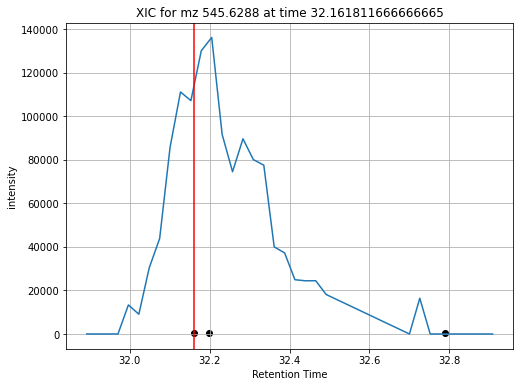

In [6]:
XIC.make_static_xic(mz, time, mzml)

Because we don't have the information about the MS2s on the graph, we would need to print that info if we want to veiw it. This function will show the information for the MS2s on the XIC

In [7]:
MS2_events = XIC.get_MS2_values(mz, time/60, mzml)
MS2_events

,scan,time,precursor,time_diff
0,7979,32.161813,545.628798,9.896083e-07
1,7995,32.198797,545.309244,3.698527e-02
2,8245,32.789369,545.238743,6.275569e-01
